In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [3]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=None)
xgc = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=6)
le = LabelEncoder()

In [4]:
X = pd.read_csv("data.csv",index_col=0)
Y = pd.read_csv("labels.csv",index_col=0)
Y['encoded_labels']=le.fit_transform(Y['disease_type'])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [5]:
rfc.fit(X_train,Y_train['disease_type'])

RandomForestClassifier()

In [6]:
rfc_y_pred=rfc.predict(X_test)

In [8]:
acc=accuracy_score(Y_test['disease_type'],rfc_y_pred)
acc

0.9719626168224299

In [9]:
xgc.fit(X_train,Y_train['encoded_labels'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [10]:
xgc_y_pred=xgc.predict(X_test)

In [11]:
acc=accuracy_score(Y_test['encoded_labels'],xgc_y_pred)
acc

0.9906542056074766

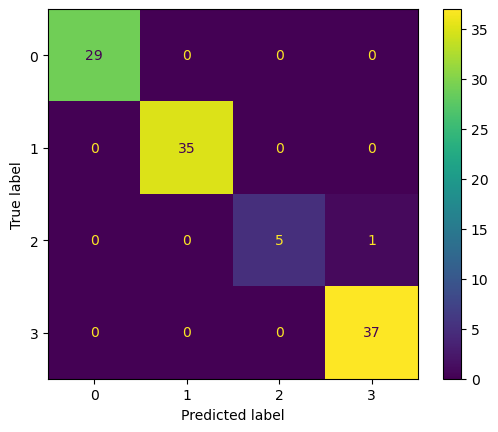

In [12]:
cm = confusion_matrix(Y_test['encoded_labels'], xgc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

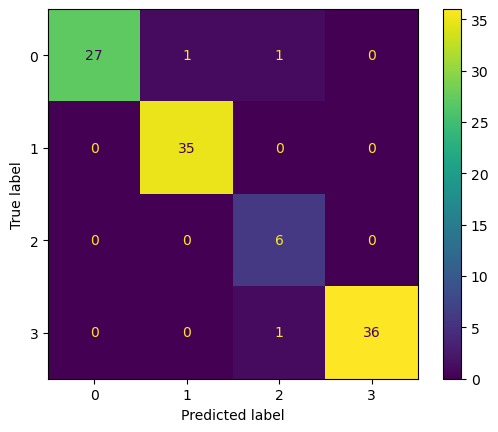

In [13]:
cm = confusion_matrix(Y_test['disease_type'], rfc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()